# Analyzing "Iowa Liquor Retail Sales" Dataset

# Step 1: Import Libraries and Explore the Dataset

## Objectives

    Load the dataset and examine its structure.
    Check the first few rows of the data.
    Assess the column data types and summary statistics.
    Identify any missing values.


# Code

In [40]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/tokamohamed/Documents/final-project-444323-70e7c50e4cc5.json"

In [41]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Initialize BigQuery client (if working with BigQuery)
from google.cloud import bigquery
from google.cloud import bigquery

client = bigquery.Client()

In [ ]:
#!pip install --upgrade google-cloud-bigquery


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [43]:
# Corrected query with valid column names
query = """
  SELECT *
FROM `bigquery-public-data.iowa_liquor_sales.sales`
WHERE date BETWEEN '2020-01-01' AND '2024-11-29'
ORDER BY RAND()
LIMIT 30000;

"""
query_job = client.query(query)
# Convert query results into a dictionary
results = query_job.result()  # This fetches all the rows from the query

In [44]:
# Load it directly into a pandas DataFrame
df = pd.DataFrame([dict(row) for row in results])

In [45]:
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-31742200010,2020-11-06,5017,LANSING IGA,417 MAIN ST,LANSING,52151.0,POINT(-91.219222 43.36182),3,ALLAMAKEE,...,38176,TITOS HANDMADE VODKA,12,750,10.00,15.00,12,180.00,9.00,2.37
1,INV-42552900003,2021-12-03,5425,SPIRITS LIQUOR / GRIMES,109 E 1ST ST. # B,GRIMES,50111.0,None,77,POLK,...,65204,TEQUILA ROSE LIQUEUR MINI,6,50,4.30,6.45,6,38.70,0.30,0.07
2,INV-75876500007,2024-10-30,5835,CASEY'S GENERAL STORE #3961 / MARCUS,406 HWY 3,MARCUS,51035.0,POINT(-95.79848 42.80795),None,CHEROKEE,...,37868,FROST TRAIL VODKA,12,750,5.22,7.83,12,93.96,9.00,2.37
3,INV-31720100050,2020-11-06,5125,CASH SAVER / E EUCLID AVE,1320 E EUCLID AVE,DES MOINES,50316.0,POINT(-93.602851 41.627778),77,POLK,...,64858,FIREBALL CINNAMON WHISKEY MINI DISPENSER,1,50,30.00,45.00,3,135.00,0.15,0.03
4,INV-72764800004,2024-07-31,4640,MART STOP #1 / DAVENPORT,3527 SPRING ST,DAVENPORT,52807,POINT(-90.547204041 41.556286007),None,SCOTT,...,36901,MCCORMICK 80PRF VODKA MINI,6,50,4.70,7.05,18,126.90,0.90,0.23


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_and_item_number  30000 non-null  object 
 1   date                     30000 non-null  object 
 2   store_number             30000 non-null  object 
 3   store_name               30000 non-null  object 
 4   address                  29993 non-null  object 
 5   city                     29993 non-null  object 
 6   zip_code                 29993 non-null  object 
 7   store_location           28094 non-null  object 
 8   county_number            15517 non-null  object 
 9   county                   29993 non-null  object 
 10  category                 29998 non-null  object 
 11  category_name            29998 non-null  object 
 12  vendor_number            30000 non-null  object 
 13  vendor_name              30000 non-null  object 
 14  item_number           

In [47]:
df.describe()

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,11.901800,810.565333,12.172179,18.259791,11.887233,163.553527,9.316086,2.455399
std,8.045557,527.964082,11.790233,17.685489,36.359267,584.546909,50.275745,13.281600
min,1.000000,20.000000,0.890000,1.340000,-48.000000,-252.000000,-36.000000,-9.510000
25%,6.000000,375.000000,6.000000,9.000000,3.000000,44.960000,1.500000,0.390000
50%,12.000000,750.000000,9.060000,13.590000,6.000000,90.000000,4.500000,1.180000
75%,12.000000,1000.000000,14.940000,22.410000,12.000000,166.560000,10.500000,2.770000
max,60.000000,5250.000000,400.100000,600.150000,3072.000000,51300.000000,5376.000000,1420.180000


In [48]:
df.nunique()

invoice_and_item_number    30000
date                        1354
store_number                2235
store_name                  2282
address                     2286
city                         454
zip_code                     858
store_location              6087
county_number                 99
county                        99
category                      92
category_name                 45
vendor_number                241
vendor_name                  174
item_number                 3158
item_description            2620
pack                          17
bottle_volume_ml              20
state_bottle_cost           1066
state_bottle_retail         1067
bottles_sold                  92
sale_dollars                3547
volume_sold_liters           180
volume_sold_gallons          174
dtype: int64

# Step 2: Data Cleaning

##  1.  Check the missing values

df.isnull().sum()

In [49]:
df.drop(['county_number','store_location'], axis=1,inplace=True)

In [50]:
df.dropna(inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29991 entries, 0 to 29999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_and_item_number  29991 non-null  object 
 1   date                     29991 non-null  object 
 2   store_number             29991 non-null  object 
 3   store_name               29991 non-null  object 
 4   address                  29991 non-null  object 
 5   city                     29991 non-null  object 
 6   zip_code                 29991 non-null  object 
 7   county                   29991 non-null  object 
 8   category                 29991 non-null  object 
 9   category_name            29991 non-null  object 
 10  vendor_number            29991 non-null  object 
 11  vendor_name              29991 non-null  object 
 12  item_number              29991 non-null  object 
 13  item_description         29991 non-null  object 
 14  pack                     29

## 2. Check the duplicates

In [52]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


## 3. Feature extraction

Here we transform the date column into datetime objects and then extracts two important time-based features: the year and the month. These new columns can be used for further analysis, such as time-based grouping or trend analysis.

In [53]:
df['date']= pd.to_datetime(df['date'])
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month

## 4. remove unnececarry columns
to focus on the relevant data

In [54]:
df.drop(['date','invoice_and_item_number','address','city',
         'zip_code','category','vendor_number','item_number',
         'item_description','volume_sold_gallons']
        , axis=1 , inplace=True)

## 4. Handling the Data Types

In [55]:
df['store_number'] = pd.to_numeric(df['store_number'], errors='coerce')

In [56]:
df.dtypes

store_number             int64
store_name              object
county                  object
category_name           object
vendor_name             object
pack                     int64
bottle_volume_ml         int64
state_bottle_cost      float64
state_bottle_retail    float64
bottles_sold             int64
sale_dollars           float64
volume_sold_liters     float64
year                     int32
month                    int32
dtype: object

## 5. Addressing Outliers or Anomalies

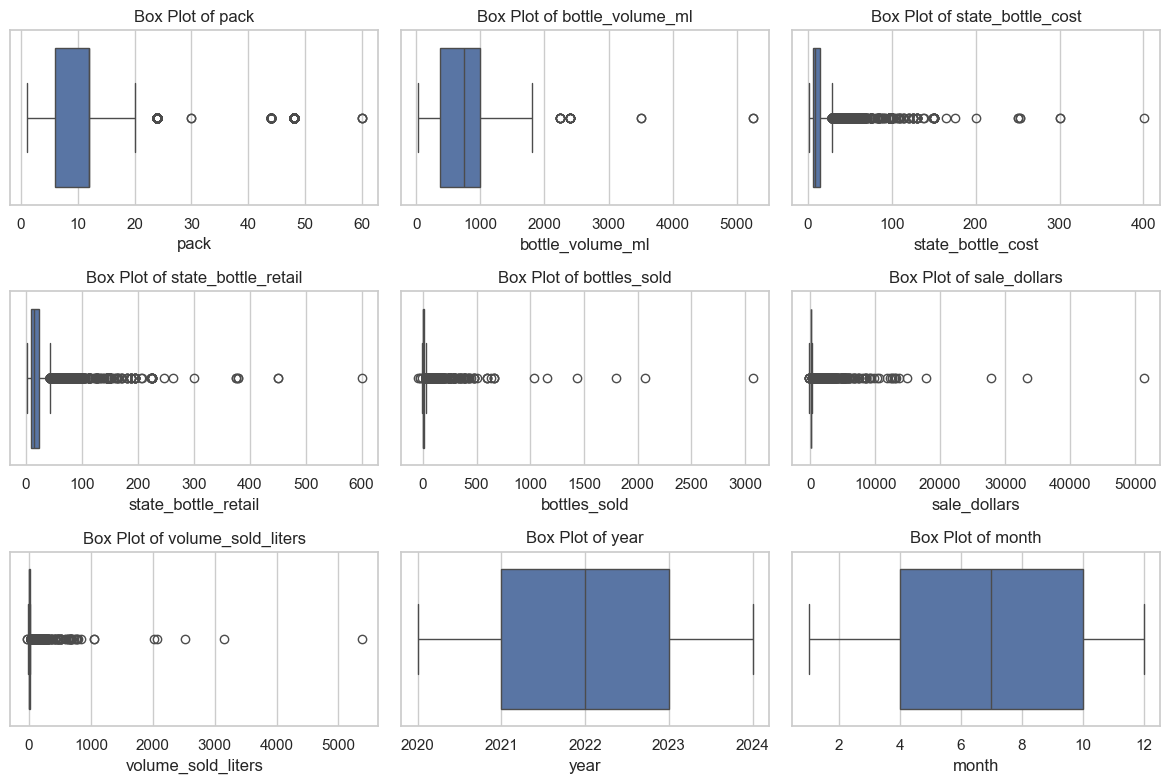

In [57]:
# Select numerical columns for the box plot
numeric_columns = ['pack', 'bottle_volume_ml', 'state_bottle_cost', 
                   'state_bottle_retail', 'bottles_sold', 
                   'sale_dollars', 'volume_sold_liters', 'year', 'month']

# Set up the matplotlib figure and seaborn styling
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create box plots for each numeric column
for i, column in enumerate(numeric_columns):
    plt.subplot(3, 3, i+1)  # Arrange plots in a 3x3 grid
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

In [58]:
df = df[(df[['bottles_sold', 'sale_dollars', 'volume_sold_liters']] >= 0).all(axis=1)]

In [59]:
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns.shape

(29977, 10)

# Step 3: Data Visualization

# Histograms for Distribution

Each histogram illustrates the distribution of values for the respective feature, providing insights into the central tendency, spread, and skewness. The kernel density estimation (KDE) overlay offers a smooth estimate of the data's probability density.

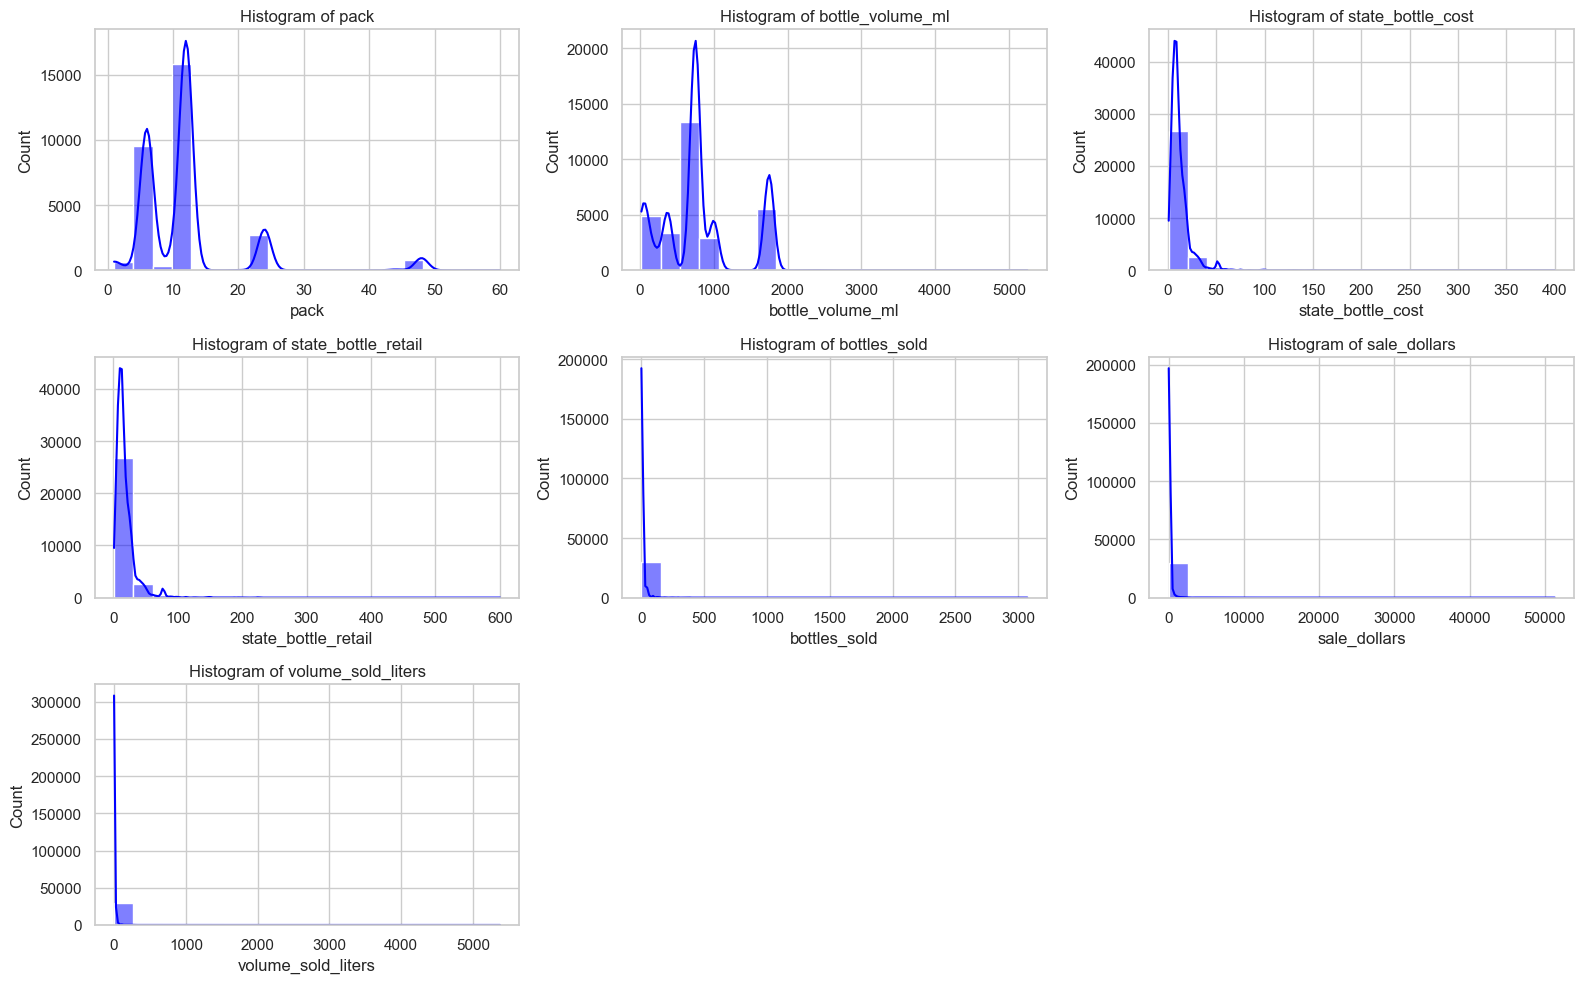

In [60]:
# List of columns to visualize
columns = ['pack', 'bottle_volume_ml', 'state_bottle_cost', 
           'state_bottle_retail', 'bottles_sold', 'sale_dollars', 'volume_sold_liters']

# Plot histograms
plt.figure(figsize=(16, 10))
for i, col in enumerate(columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

1. Pack: The distribution shows most pack sizes are concentrated around smaller values, likely representing popular or standard pack sizes.
2. Bottle Volume (ml): A right-skewed distribution, indicating a majority of bottle sizes fall within a smaller range, with some larger sizes being less common.
3. State Bottle Cost: Displays a steep peak at lower costs, suggesting most bottles are priced economically, with fewer higher-cost bottles.
4. State Bottle Retail: Follows a similar trend to the state bottle cost, as retail prices are closely tied to production costs.
5. Bottles Sold: Right-skewed, indicating that while smaller quantities dominate, there are occasional large sales.
6. Sale Dollars: Exhibits a long tail, showing most transactions are of lower value, with some high-value sales contributing significantly to overall revenue.
7. Volume Sold (Liters): The distribution reflects that smaller quantities dominate sales, with occasional spikes for bulk transactions.

# Scatter plots to explore relationships

Identifies a possible relationship between changes observed in two different sets of variables.

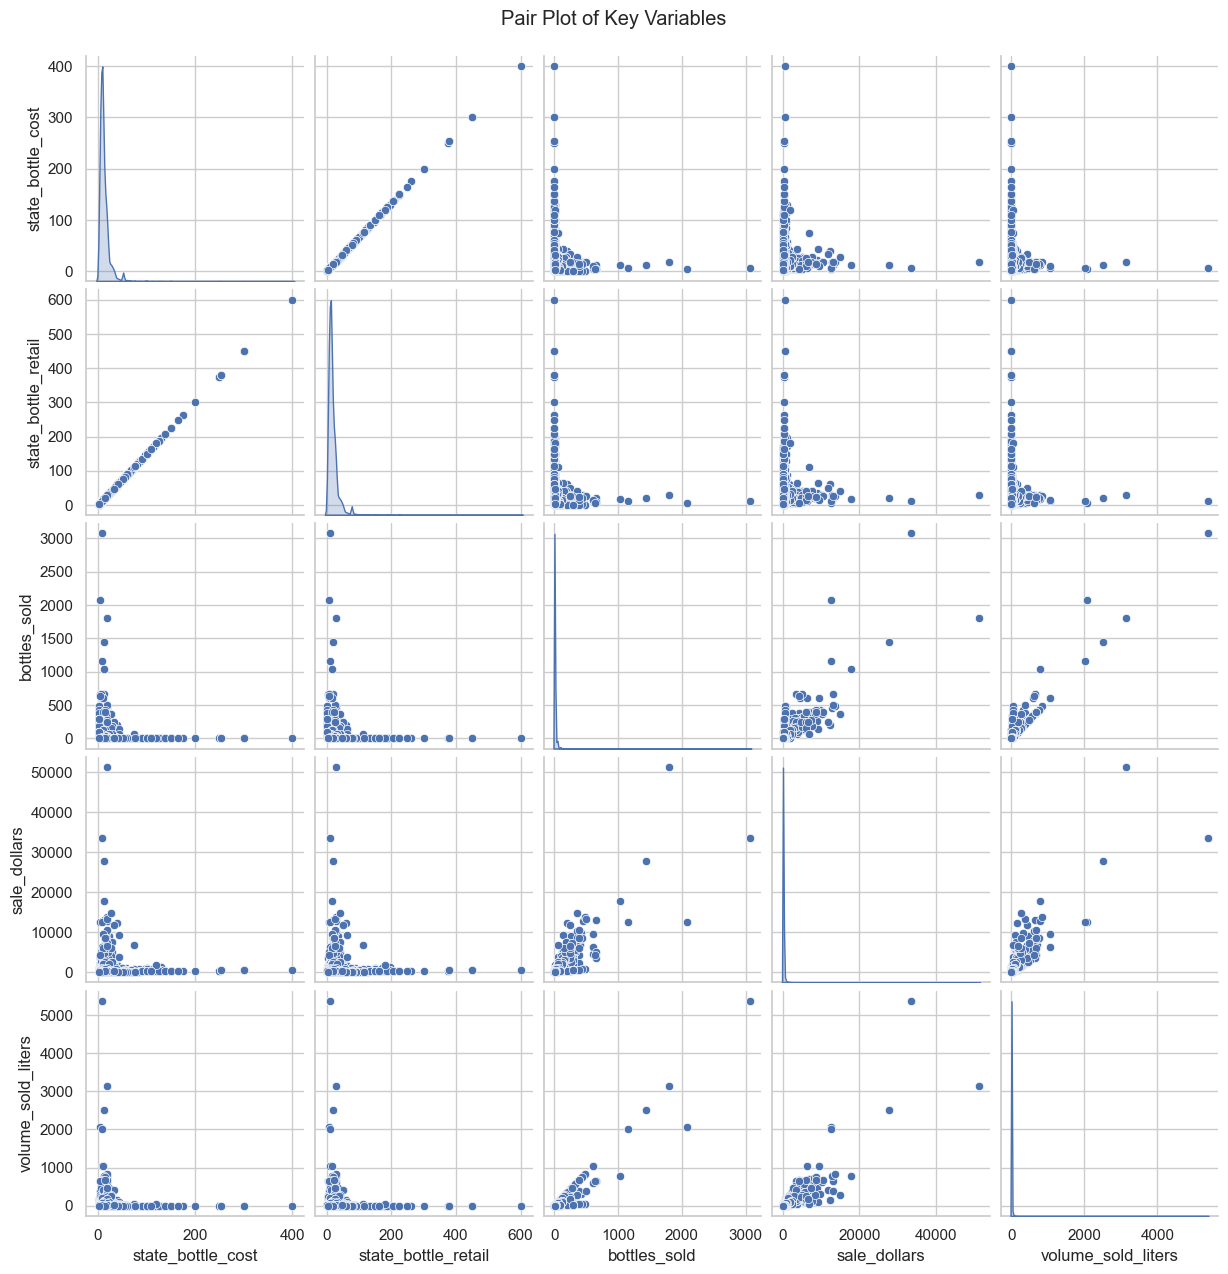

In [61]:
# Scatter plots to explore relationships
sns.pairplot(df[['state_bottle_cost', 'state_bottle_retail', 
                 'bottles_sold', 'sale_dollars', 'volume_sold_liters']], diag_kind='kde')
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()

# Observations from the Scatter Plots:

1. State Bottle Cost vs. State Bottle Retail:
A strong positive linear relationship is evident. This suggests that as the state bottle cost increases, the state bottle retail price also tends to increase proportionally.

2. State Bottle Cost vs. Bottles Sold:
A weak negative relationship is observed. This implies that as the state bottle cost increases, the number of bottles sold might slightly decrease. However, the relationship is not very strong.

3. State Bottle Cost vs. Sale Dollars:
A weak positive relationship exists. This indicates that higher state bottle costs might lead to slightly higher sales revenue, possibly due to the increased retail price.

4. State Bottle Cost vs. Volume Sold Liters:
A weak positive relationship is observed, similar to the relationship with sale dollars. This suggests that higher state bottle costs might result in a small increase in the volume of alcohol sold.

5. State Bottle Retail vs. Bottles Sold:
A weak negative relationship is observed, similar to the relationship with state bottle cost. This suggests that as the retail price increases, the number of bottles sold might slightly decrease. However, the relationship is not very strong.

6. State Bottle Retail vs. Sale Dollars:
A stronger positive relationship is evident. This indicates that higher retail prices generally lead to higher sales revenue.

7. State Bottle Retail vs. Volume Sold Liters:
A stronger positive relationship is observed, similar to the relationship with sale dollars. This suggests that higher retail prices generally lead to a higher volume of alcohol sold.

8. Bottles Sold vs. Sale Dollars:
A strong positive linear relationship is evident. This indicates that as the number of bottles sold increases, the sales revenue also increases proportionally.

9. Bottles Sold vs. Volume Sold Liters:
A strong positive linear relationship is evident. This indicates that as the number of bottles sold increases, the total volume of alcohol sold also increases proportionally.

10. Sale Dollars vs. Volume Sold Liters:
A strong positive linear relationship is evident. This indicates that as the sales revenue increases, the total volume of alcohol sold also increases proportionally.


### Additional Insights:
The diagonal KDE plots provide information about the distribution of each variable. For example, the distribution of state bottle costs appears to be right-skewed, with a few states having significantly higher costs.

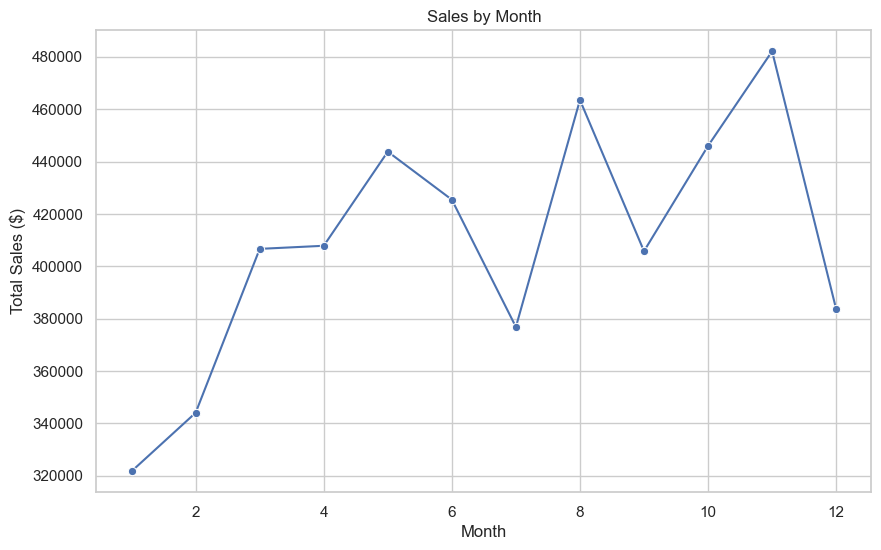

In [62]:
# Aggregated sales data by month
time_data = df.groupby('month')['sale_dollars'].sum().reset_index()

# Line plot of sales over months
plt.figure(figsize=(10, 6))
sns.lineplot(data=time_data, x='month', y='sale_dollars', marker='o')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()

The graph shows a general upward trend in sales from month 1 to month 11, with a significant peak in month 11.
There's a sharp decline in sales from month 11 to month 12.

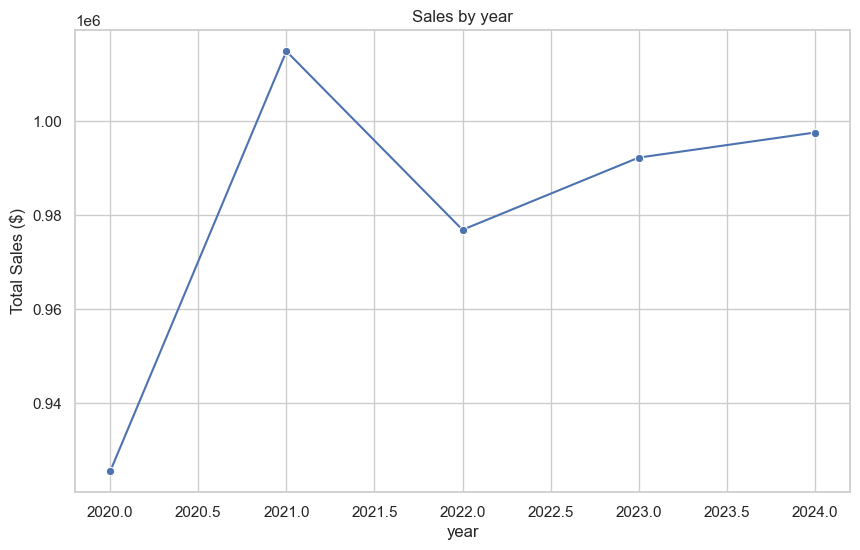

In [63]:
# Aggregated sales data by month
time_data = df.groupby('year')['sale_dollars'].sum().reset_index()

# Line plot of sales over months
plt.figure(figsize=(10, 6))
sns.lineplot(data=time_data, x='year', y='sale_dollars', marker='o')
plt.title('Sales by year')
plt.xlabel('year')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()

The upward trend from 2020 to 2023 suggests that the business was experiencing significant growth.
The sharp decline in 2024 is a cause for concern and warrants further investigation. Possible reasons for this drop could include economic factors, increased competition, changes in consumer behavior, or internal issues within the business.

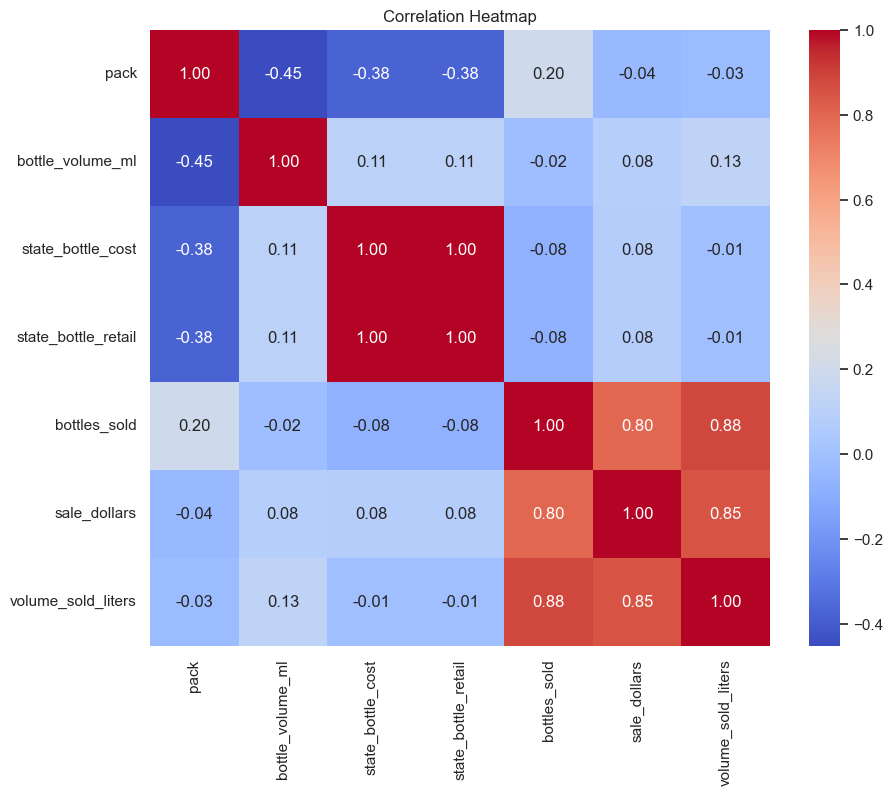

In [64]:
# Compute correlation matrix
correlation = df[columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The heatmap visualizes the correlation between different variables related to alcohol sales. Red squares indicate a strong positive correlation, while blue squares indicate a strong negative correlation. The lighter shades indicate a weaker correlation.

### Key Observations:

#### 1. Strong Positive Correlation:
bottle_sold vs. volume_sold_liters: As expected, there is a very strong positive correlation between the number of bottles sold and the total volume       sold in liters. This is logical since a higher volume would mean more bottles sold.

#### 2. Moderate Positive Correlations:
state_bottle_retail vs. state_bottle_cost: There is a strong moderate positive correlation between the retail price and the cost of the bottles. This      implies that as the retail price of a bottle increases, so does the cost of the bottle.
sale_dollars vs. bottles_sold: There is a strong moderate positive correlation between the total sale dollars and the bottles sold. Intuitively, if        more bottles are sold, the total sales in dollars should increase.

#### 3. Negligible or Weak Correlations:
Most of the other correlations shown in the heatmap are negligible or weak. For instance, the correlation between state bottle cost and volume sold in liters is very weak, indicating that the cost of the bottle has little to no impact on the volume sold.

# Step 4: Data Preprocessing

"Search for steps suitable for the following ML algorithms"

    Encoding categorical data.
    Scaling or normalizing numerical features.
    Feature engineering (e.g., creating or combining features).

## Scaling Data

In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
nums = df.select_dtypes(include=['int64', 'float64']).columns

df[nums]= scaler.fit_transform(df[nums])

In [66]:
df

,store_number,store_name,county,category_name,vendor_name,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,year,month
0,0.346548,LANSING IGA,ALLAMAKEE,AMERICAN VODKAS,FIFTH GENERATION INC,0.186441,0.139579,0.022820,0.022812,0.003582,0.003481,0.001667,2020,11
1,0.395119,SPIRITS LIQUOR / GRIMES,POLK,CREAM LIQUEURS,MCCORMICK DISTILLING CO.,0.084746,0.005736,0.008542,0.008534,0.001628,0.000727,0.000048,2021,12
2,0.443929,CASEY'S GENERAL STORE #3961 / MARCUS,CHEROKEE,AMERICAN VODKAS,SAZERAC COMPANY INC,0.186441,0.139579,0.010846,0.010838,0.003582,0.001804,0.001667,2024,10
3,0.359405,CASH SAVER / E EUCLID AVE,POLK,WHISKEY LIQUEUR,SAZERAC COMPANY INC,0.000000,0.005736,0.072919,0.072911,0.000651,0.002604,0.000020,2020,11
4,0.301667,MART STOP #1 / DAVENPORT,SCOTT,AMERICAN VODKAS,MCCORMICK DISTILLING CO.,0.084746,0.005736,0.009544,0.009536,0.005536,0.002446,0.000160,2024,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.054643,HY-VEE FOOD STORE (1636) / SPENCER,CLAY,BLENDED WHISKIES,JIM BEAM BRANDS,0.186441,0.139579,0.025325,0.025317,0.000977,0.001259,0.000551,2024,1
29996,0.052262,HY-VEE DRUGSTORE (7042) / IOWA CITY,JOHNSON,AMERICAN DISTILLED SPIRITS SPECIALTY,SUGARLANDS DISTILLING COMPANY LLC,0.084746,0.139579,0.029834,0.029826,0.000326,0.000721,0.000272,2023,11
29997,0.046905,HY-VEE FOOD STORE #1 (1013) / AMES,STORY,AMERICAN VODKAS,LAIRD & COMPANY,0.084746,0.330784,0.017109,0.017101,0.001628,0.001327,0.001946,2024,5
29998,0.326429,KUM & GO #246 / WINTERSET,MADISON,STRAIGHT BOURBON WHISKIES,JDSO INC / RED BOOT DISTILLERY,0.084746,0.139579,0.032840,0.032832,0.001628,0.002428,0.000830,2021,8


## Encoding Data

In [67]:
# Frequency Encoding
for col in ['category_name', 'county', 'vendor_name']:
    freq_encoding = df[col].value_counts()
    df[col + '_freq_encoded'] = df[col].map(freq_encoding)

In [68]:
df.drop(['county','store_name','category_name','vendor_name'],axis=1,inplace=True)

In [69]:
df

,store_number,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,year,month,category_name_freq_encoded,county_freq_encoded,vendor_name_freq_encoded
0,0.346548,0.186441,0.139579,0.022820,0.022812,0.003582,0.003481,0.001667,2020,11,4630,110,846
1,0.395119,0.084746,0.005736,0.008542,0.008534,0.001628,0.000727,0.000048,2021,12,561,5699,675
2,0.443929,0.186441,0.139579,0.010846,0.010838,0.003582,0.001804,0.001667,2024,10,4630,103,4308
3,0.359405,0.000000,0.005736,0.072919,0.072911,0.000651,0.002604,0.000020,2020,11,1736,5699,4308
4,0.301667,0.084746,0.005736,0.009544,0.009536,0.005536,0.002446,0.000160,2024,7,4630,1767,675
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.054643,0.186441,0.139579,0.025325,0.025317,0.000977,0.001259,0.000551,2024,1,1201,209,2403
29996,0.052262,0.084746,0.139579,0.029834,0.029826,0.000326,0.000721,0.000272,2023,11,103,1393,23
29997,0.046905,0.084746,0.330784,0.017109,0.017101,0.001628,0.001327,0.001946,2024,5,4630,887,557
29998,0.326429,0.084746,0.139579,0.032840,0.032832,0.001628,0.002428,0.000830,2021,8,2156,122,121


In [70]:
x = df[[
    'store_number', 'pack', 'bottle_volume_ml', 'state_bottle_cost',
    'state_bottle_retail', 'bottles_sold', 'volume_sold_liters',
    'year', 'month', 'category_name_freq_encoded',
    'county_freq_encoded', 'vendor_name_freq_encoded'
]]
y = df['sale_dollars']

## Split into training and testing sets

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 5: Machine Learning Algorithms

## Dataset Characteristics

    Goal: Predict income_bracket (binary classification: <=50K or >50K).
    Features: Mix of numerical (e.g., age, hours_per_week) and categorical (e.g., workclass, occupation) data. Some features (e.g., capital_gain and           capital_loss) have skewed distributions or high sparsity.
    The target is imbalanced: typically, fewer people earn >50K.

## 1. multiple Linear Regression

Why??

    Works well for binary classification.
    Performs efficiently on structured datasets with preprocessed data.
    Handles imbalanced classes reasonably well when combined with class weights or balancing techniques.

In [79]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [80]:
y_pred = model.predict(X_test)

In [81]:
mse = mean_squared_error(y_test, y_pred)
mse

1.911695204979855e-05

In [82]:
rmse=np.sqrt(mse)
rmse

0.004372293682931025

In [84]:
r2 = r2_score(y_test, y_pred)
r2

0.739416287962833

In [77]:
coefficients = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_
})
coefficients

,Feature,Coefficient
0,store_number,-6.061705e-04
1,pack,-4.040733e-03
2,bottle_volume_ml,-1.763163e-03
3,state_bottle_cost,-3.119209e-01
4,state_bottle_retail,3.471854e-01
5,bottles_sold,2.678887e-01
6,volume_sold_liters,7.140998e-01
7,year,-7.945067e-06
8,month,3.190958e-05
9,category_name_freq_encoded,-1.001443e-07
